### Mappeoppgave 5 - webskraping & lineær regresjon

Formålet med oppgaven er å lære metoder for å skrape data fra nettet og benytte regresjonsanalyse.          
Jeg kjører en regresjon på tilfeldig valgt data fra [e24.no]('https://e24.no/boers-og-finans/i/39BQ5e/soek-i-oljefondets-over-9000-aksjer-saa-mye-eier-du-i-apple-og-tesla') som viser oljefondets aksjeeierskap fordelt på hver innbygger.      
Koden er hentet fra Espen Sirnes sine forelesningsnotater (9 - webskraping med python).     

In [5]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://e24.no/boers-og-finans/i/39BQ5e/soek-i-oljefondets-over-9000-aksjer-saa-mye-eier-du-i-apple-og-tesla')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="table css-g9zmyn"><tbody><tr class="css-0"><style data-emotion="css l4upzl">.css-l4upzl{padding:10px var(--gap-unit);background-color:var(--component-background-color-01);color:var(--component-text-color-01);border-top:none;border-bottom:1px #f1f1f1 solid;border-left:none;border-right:none;}</style><td class="css-l4upzl">Selskap</td><td class="css-l4upzl">Du eier (kr.)</td><td class="css-l4upzl">Oljefondets aksjer (mrd.kr.)</td></tr><tr class="css-0"><td class="css-l4upzl">Microsoft Corp</td><td class="css-l4upzl">28.085</td><td class="css-l4upzl">150,75</td></tr><tr class="css-0"><td class="css-l4upzl">Apple Inc  </td><td class="css-l4upzl">27.726</td><td class="css-l4upzl">148,82</td></tr><tr class="css-0"><td class="css-l4upzl">Amazon.com Inc 121 097</td><td class="css-l4upzl">22.561</td><td class="css-l4upzl">121,10</td></tr><tr class="css-0"><td class="css-l4upzl">Alphabet Inc 90 310</td><td class="css-l4upzl">16.825</td><td class="css-l4upzl">90,31</td></tr><tr clas

In [6]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['Selskap', 'Du eier (kr.)', 'Oljefondets aksjer (mrd.kr.)'], ['Microsoft Corp', '28.085', '150,75'], ['Apple Inc  ', '27.726', '148,82'], ['Amazon.com Inc 121 097', '22.561', '121,10'], ['Alphabet Inc 90 310', '16.825', '90,31'], ['Nestlé SA  ', '15.368', '82,49'], ['Roche Holding AG', '12.447', '66,81 '], ['Alibaba Group Holding Ltd  ', '11.171', '59,96'], ['Facebook Inc ', '10.916', '58,59'], ['Tencent Holdings Ltd ', '9.898', '53,13 '], ['Novartis AG', '8.654', '46,45']]


In [7]:
';'.join(table[0])

'Selskap;Du eier (kr.);Oljefondets aksjer (mrd.kr.)'

In [8]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('df.csv',table)

In [9]:
import pandas as pd

df = pd.read_csv('df.csv', delimiter=';', encoding='latin1')
df

,Selskap,Du eier (kr.),Oljefondets aksjer (mrd.kr.)
0,Microsoft Corp,28.085,"150,75"
1,Apple Inc,27.726,"148,82"
2,Amazon.com Inc 121 097,22.561,"121,10"
3,Alphabet Inc 90 310,16.825,"90,31"
4,Nestlé SA,15.368,"82,49"
5,Roche Holding AG,12.447,"66,81"
6,Alibaba Group Holding Ltd,11.171,"59,96"
7,Facebook Inc,10.916,"58,59"
8,Tencent Holdings Ltd,9.898,"53,13"
9,Novartis AG,8.654,"46,45"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Selskap                       10 non-null     object 
 1   Du eier (kr.)                 10 non-null     float64
 2   Oljefondets aksjer (mrd.kr.)  10 non-null     object 
dtypes: float64(1), object(2)
memory usage: 368.0+ bytes


In [11]:
df["Oljefondets aksjer (mrd.kr.)"] = df["Oljefondets aksjer (mrd.kr.)"].str.replace(',','.')
df["Oljefondets aksjer (mrd.kr.)"] = pd.to_numeric(df["Oljefondets aksjer (mrd.kr.)"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Selskap                       10 non-null     object 
 1   Du eier (kr.)                 10 non-null     float64
 2   Oljefondets aksjer (mrd.kr.)  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 368.0+ bytes


#### Regresjon

In [13]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [14]:
y=pd.DataFrame(df['Du eier (kr.)'])
x=pd.DataFrame(df['Oljefondets aksjer (mrd.kr.)'])
x = sm.add_constant(x)

In [15]:
res=OLS(y,x).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Du eier (kr.)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.555e+09
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.18e-36
Time:                        12:36:22   Log-Likelihood:                 68.254
No. Observations:                  10   AIC:                            -132.5
Df Residuals:                       8   BIC:                            -131.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\mgmal\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


En kan se at sammenhengen mellom x og y er statistisk signifikant og at 100% av variasjonen i y kan forklares ved regresjonslinjen. Dette er ikke overraskende siden varibelen x er variabelen y delt på antallet innbyggere i Norge. Dataene er lite egnet for regresjonsanalyse. Jeg understreker at formålet med oppgaven er å trene på webskraping og bruken av statsmodels i jupyter notebook. 

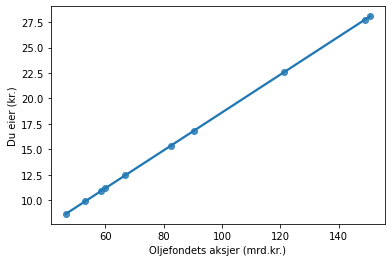

In [16]:
import seaborn as sns

sns.regplot(x='Oljefondets aksjer (mrd.kr.)', y='Du eier (kr.)', data=df)